# Sistemas de Coordenadas Celestes

Date: 2020-03-24  
Author: Luciano Barosi
Categories: Python, Cosmology
Tags: Pulsars, FRB, Astropy 
featured: true
<!--eofm-->

In [1]:
# Importando os módulos necessários
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd

## Pulsares

Podemos acessar o catálogo de pulsares em https://www.atnf.csiro.au/research/pulsar/index.html
 
"The ATNF Pulsar Catalogue", R. N. Manchester, G. B. Hobbs, A. Teoh & M. Hobbs, Astronomical Journal, 129, 1993-2006 (2005) and by quoting the web address http://www.atnf.csiro.au/research/pulsar/psrcat for updated versions.
 
Este catálogo pode ser acessado online ou pelo programa psrcat. Eu apenas salvei as informações em um formato CSV. 

In [2]:
# Lemos os dados, definimos o separador, cuidados do cabeçalho e dos valores esquisitos que aparecem no arquivo.
df = pd.read_csv("ATNFcatalogP0.csv", sep=";", header=0, na_values="*", keep_default_na=True)
#Horrível mas ocabecalho original tem duas linhas, estou jogando uma fora.
df = df.drop([0])
#Voilá
df.head(3)

,num,NAME,Gl,Gb,RAJD,DECJD,P0,DM,S1400,R_LUM14,Unnamed: 10
1,1,J0002+6216,117.327,-0.074,0.742375,62.269278,0.115364,218.60,0.02,8.90e-01,NaN
2,2,J0006+1834,108.172,-42.985,1.520000,18.583056,0.693748,11.41,NaN,NaN,NaN
3,3,J0007+7303,119.660,10.463,1.757083,73.052056,0.315873,NaN,NaN,NaN,NaN


### Coordenadas Galacticas

In [3]:
# pandas não reconheceu l e b como números, corrigimos isto aqui.
df["Gl"] = df.Gl.astype(float)
df["Gb"] = df.Gb.astype(float)

In [5]:
# Vamos usar uma coordenada do tipo ângulo do astropy. 
# a Longitude Galáctica vai de é um ângulo de -180 a 180
# Passamos tudo para radianos
GL = coord.Angle(df.Gl*u.degree)
GL = GL.wrap_at(180*u.degree)
df["GB"] = coord.Angle(df.Gb*u.degree).radian
df["GL"] = GL.radian

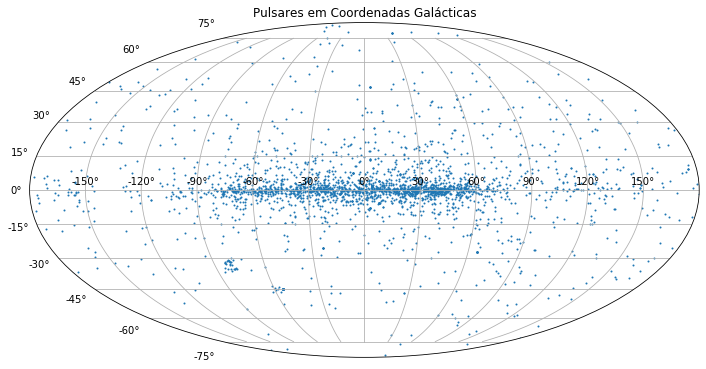

In [78]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_title("Pulsares em Coordenadas Galácticas")
ax.scatter(df.GL, df.GB, s = 1)
ax.grid(True)
#fig.savefig('PulsarsG.png', dpi=150)
plt.show();

### Coordenadas Equatoriais

In [79]:
# Astropy sabe transformar os sistemas de coordenadas.
DATA = SkyCoord(l = df.GL, b = df.GB, frame = "galactic", unit = u.rad )
DATARaDec = DATA.icrs

In [73]:
# Ascenção Reta é um ângulo de -180 a 180
# Skycoord devolve os parâmetros em ângulos, vamos voltar para radianos, por causa do plot.
RAradian = DATARaDec.ra.wrap_at(180*u.degree).radian
DECradian = DATARaDec.dec.radian

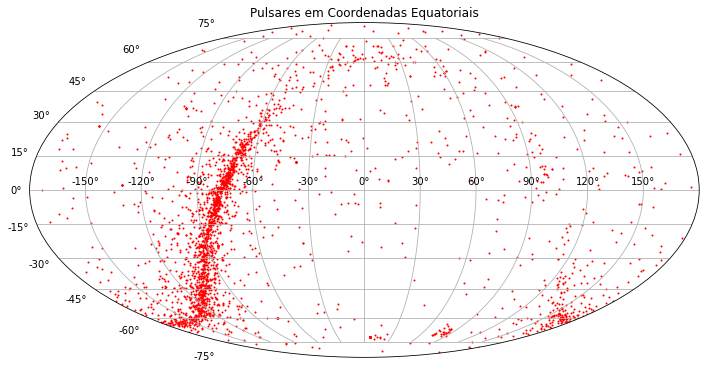

In [80]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_title("Pulsares em Coordenadas Equatoriais")
ax.scatter(RAradian, DECradian, s = 1, c="red")
ax.grid(True)
#fig.savefig('PulsarsICRS.png', dpi=150)
plt.show();

## Fast Radio Bursts

 Também temos um catálogo de FRBs disponíveis facilmente. 
 
 *The most recent version of the catalogue database and previous versions are available in CSV format on Zenodo at the DOI: http://www.frbcat.org/frbcat.csv*

In [81]:
FRB = pd.read_csv("frbcat_20200305.csv")

In [82]:
# Mesmo procedimento utilizado para os pulsares.
GL_F = coord.Angle(FRB.rop_gl*u.degree)
GL_F = GL_F.wrap_at(180*u.degree)
FRB["GB"] = coord.Angle(FRB.rop_gb*u.degree).radian
FRB["GL"] = GL_F.radian
FRB["telescope"]=FRB.telescope.astype("category")

In [98]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


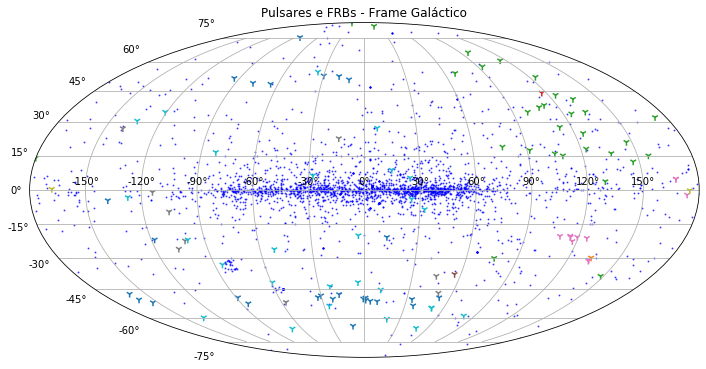

In [104]:
# Vamos pintar os FRBs pelo equipamento que o descobriu
import matplotlib.cm as cm
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_title("Pulsares e FRBs - Frame Galáctico")
ax.scatter(x = df.GL, y=df.GB, c = "blue", s=1, alpha = 0.6)
ax.scatter(x = FRB.GL, y = FRB.GB, marker = "1", s=50, c= FRB.telescope.cat.codes, cmap=cm.tab10)
ax.grid(True)
#fig.savefig('Pulsars_FRB_Gal.png', dpi=150)
plt.show();

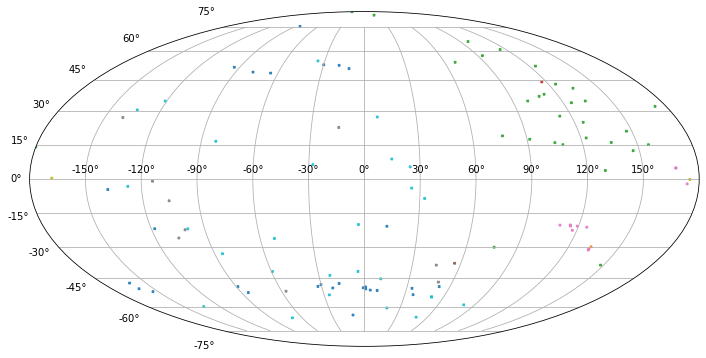

In [105]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
PONTOS = ax.scatter(x = FRB.GL, y = FRB.GB, marker = "x", s = 5, alpha=0.90, c= FRB.telescope.cat.codes, cmap=cm.tab10)
ax.grid(True)
#fig.savefig('Pulsars_FRB_Gal.png', dpi=150)
plt.show();